In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 실제 데이터(iris data)로 Pandas 가지고 놀기

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" width=50%>

In [ ]:
from sklearn import datasets

In [ ]:
iris_data = datasets.load_iris()

iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df_x = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
df_x.head() # top rows of the frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df_x.tail(3) # bottom rows of the frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
df_y = pd.DataFrame(iris_data['target'], columns=['target'])
df_y.head(3)

,target
0,0
1,0
2,0


In [ ]:
df_y.tail()

,target
145,2
146,2
147,2
148,2
149,2


In [ ]:
print(iris_data['target_names'])

['setosa' 'versicolor' 'virginica']


In [ ]:
df_x.describe()  # 각 차원의 통계적 정보를 출력

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Percentiles (백분위수) 

20 명으로 구성된 그룹에서 당신이 네번째로 키가 큰 사람이라면, 80%의 그룹의 사람들이 당신보다 작을 것임:

![image](https://www.mathsisfun.com/data/images/percentile-80.svg)

이를 percentile 80% 라고 말할 수 있음

만약, 당신의 키가 1.85m 라면, 1.85는 그 그룹에서 80% percentile에 해당하는 값임

In [ ]:
df_x.T    # transpose

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149
sepal length (cm),5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,5.4,4.8,4.8,4.3,5.8,5.7,5.4,5.1,5.7,5.1,5.4,5.1,4.6,5.1,4.8,5.0,5.0,5.2,5.2,4.7,4.8,5.4,5.2,5.5,4.9,5.0,5.5,4.9,4.4,5.1,...,6.5,6.4,6.8,5.7,5.8,6.4,6.5,7.7,7.7,6.0,6.9,5.6,7.7,6.3,6.7,7.2,6.2,6.1,6.4,7.2,7.4,7.9,6.4,6.3,6.1,7.7,6.3,6.4,6.0,6.9,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width (cm),3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,3.7,3.4,3.0,3.0,4.0,4.4,3.9,3.5,3.8,3.8,3.4,3.7,3.6,3.3,3.4,3.0,3.4,3.5,3.4,3.2,3.1,3.4,4.1,4.2,3.1,3.2,3.5,3.6,3.0,3.4,...,3.2,2.7,3.0,2.5,2.8,3.2,3.0,3.8,2.6,2.2,3.2,2.8,2.8,2.7,3.3,3.2,2.8,3.0,2.8,3.0,2.8,3.8,2.8,2.8,2.6,3.0,3.4,3.1,3.0,3.1,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,1.5,1.6,1.4,1.1,1.2,1.5,1.3,1.4,1.7,1.5,1.7,1.5,1.0,1.7,1.9,1.6,1.6,1.5,1.4,1.6,1.6,1.5,1.5,1.4,1.5,1.2,1.3,1.4,1.3,1.5,...,5.1,5.3,5.5,5.0,5.1,5.3,5.5,6.7,6.9,5.0,5.7,4.9,6.7,4.9,5.7,6.0,4.8,4.9,5.6,5.8,6.1,6.4,5.6,5.1,5.6,6.1,5.6,5.5,4.8,5.4,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,0.2,0.2,0.1,0.1,0.2,0.4,0.4,0.3,0.3,0.3,0.2,0.4,0.2,0.5,0.2,0.2,0.4,0.2,0.2,0.2,0.2,0.4,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,...,2.0,1.9,2.1,2.0,2.4,2.3,1.8,2.2,2.3,1.5,2.3,2.0,2.0,1.8,2.1,1.8,1.8,1.8,2.1,1.6,1.9,2.0,2.2,1.5,1.4,2.3,2.4,1.8,1.8,2.1,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8


In [ ]:
df_x.sort_index(axis=1)  # column 이름을 기준으로 정렬

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6
...,...,...,...,...
145,5.2,2.3,6.7,3.0
146,5.0,1.9,6.3,2.5
147,5.2,2.0,6.5,3.0
148,5.4,2.3,6.2,3.4


In [ ]:
df_x.sort_values(by='petal length (cm)', ascending=True) # 정렬

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
13,4.3,3.0,1.1,0.1
14,5.8,4.0,1.2,0.2
35,5.0,3.2,1.2,0.2
36,5.5,3.5,1.3,0.2
...,...,...,...,...
131,7.9,3.8,6.4,2.0
105,7.6,3.0,6.6,2.1
117,7.7,3.8,6.7,2.2
122,7.7,2.8,6.7,2.0


In [ ]:
df_x.iloc[0:5, 1:3]   # slicing

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


In [ ]:
df_x.iloc[[1, 2, 4], [0, 2]]

,sepal length (cm),petal length (cm)
1,4.9,1.4
2,4.7,1.3
4,5.0,1.4


### Boolean Indexing

In [ ]:
df_x[df_x['sepal length (cm)'] > 7.4]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
105,7.6,3.0,6.6,2.1
117,7.7,3.8,6.7,2.2
118,7.7,2.6,6.9,2.3
122,7.7,2.8,6.7,2.0
131,7.9,3.8,6.4,2.0
135,7.7,3.0,6.1,2.3


In [ ]:
df_x[(df_x['sepal length (cm)'] > 7.4) & (df_x['petal width (cm)'] > 2.2)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
118,7.7,2.6,6.9,2.3
135,7.7,3.0,6.1,2.3


### 값 바꾸기

In [ ]:
df_x.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [ ]:
df_x.iat[0, 1]

3.5

In [ ]:
df_x.iat[0, 1] = 3.4   # is equal to df_x.iloc[0, 1]
df_x.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.4,1.4,0.2
1,4.9,3.0,1.4,0.2


In [ ]:
df_x_copied = df_x.copy()  # 복사

df_x_copied.loc[:, 'samples'] = 0
df_x_copied.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),samples
0,5.1,3.4,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.4,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df_x_with_y = df_x.copy()  # 복사
# iris_data['target_names'] = ['setosa' 'versicolor' 'virginica']

df_x_with_y['target'] = iris_data['target_names'][df_y]
# df_x_with_y['target'] = a[df_y]  # [ ['setosa'], ['setosa'], ...  ]] (150, 1)
df_x_with_y.sample(5)   # 임의의 샘플들을 추출

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
69,5.6,2.5,3.9,1.1,versicolor
103,6.3,2.9,5.6,1.8,virginica
112,6.8,3.0,5.5,2.1,virginica
12,4.8,3.0,1.4,0.1,setosa
140,6.7,3.1,5.6,2.4,virginica


### Categorical Data

In [ ]:
df_x_with_y['target'] = df_x_with_y['target'].astype("category")

In [ ]:
df_x_with_y['target']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [ ]:
df_x_with_y['target'].unique()    # 유일 값

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [ ]:
df_x_with_y['target'].cat.categories

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

In [ ]:
# categorical 범위 수정하기
df_x_with_y['target'] = df_x_with_y['target'].cat.set_categories(['setosa', 'versicolor', 'virginica', 'koreana'])
df_x_with_y['target'].cat.categories

Index(['setosa', 'versicolor', 'virginica', 'koreana'], dtype='object')

In [ ]:
df_x_with_y['target'].unique()      # 실제 row 중 unique한 값들을 찾는 것

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [ ]:
df_x_with_y.groupby("target").size()  # 유일값 빈도 

target
setosa        50
versicolor    50
virginica     50
koreana        0
dtype: int64

### Stat

In [ ]:
df_x.mean() # 평균

sepal length (cm)    5.843333
sepal width (cm)     3.056667
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [ ]:
df_x.mean(axis=1)

0      2.525
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [ ]:
import seaborn as sns

df_corr = df_x.corr()  # 상관계수 (correlation )

df_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.116349,0.871754,0.817941
sepal width (cm),-0.116349,1.000000,-0.426977,-0.364614
petal length (cm),0.871754,-0.426977,1.000000,0.962865
petal width (cm),0.817941,-0.364614,0.962865,1.000000


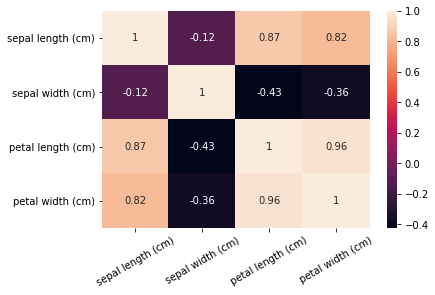

In [ ]:
heatmap = sns.heatmap(df_corr,  annot=True,)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30)

heatmap

![image](https://t1.daumcdn.net/cfile/tistory/2533B54B58BD19341C)

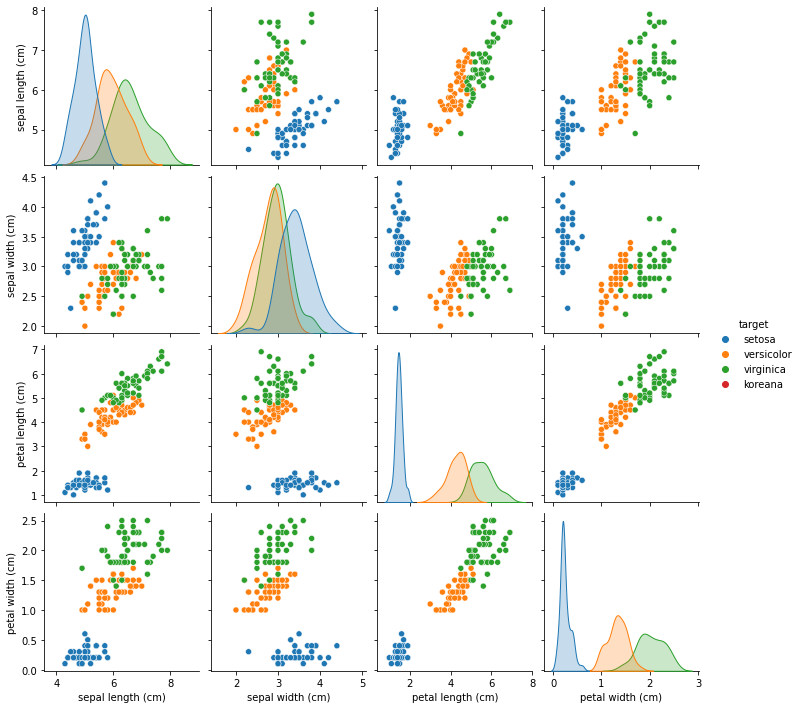

In [ ]:
g = sns.pairplot(df_x_with_y, hue="target")

## Merge


### Concat

In [ ]:
a = df_x.iloc[:2]
b = df_x.iloc[5:7]

a

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.4,1.4,0.2
1,4.9,3.0,1.4,0.2


In [ ]:
b

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3


In [ ]:
pd.concat([a, b], axis=0)  # column 이 동일해야 함

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.4,1.4,0.2
1,4.9,3.0,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3


In [ ]:
pd.concat([a, b], axis=1)   # index 가 동일해야함

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.4,1.4,0.2,NaN,NaN,NaN,NaN
1,4.9,3.0,1.4,0.2,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,5.4,3.9,1.7,0.4
6,NaN,NaN,NaN,NaN,4.6,3.4,1.4,0.3


### Join

In [ ]:
left = pd.DataFrame({'key': ['foo', 'bar'], 
                     'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 
                      'rval': [4, 5]})

left

,key,lval
0,foo,1
1,bar,2


In [ ]:
right

,key,rval
0,foo,4
1,bar,5


In [ ]:
# 결합을 위한 기준 변수를 지정하지 않으면 중복된 이름의 열을 기준으로 결합
# 명시적으로 on 옵션을 이용하여 기준 변수를 지정하는 것이 필요
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


#### key가 다를 경우

In [ ]:
left = pd.DataFrame({'key1': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'lval': range(7)})
right = pd.DataFrame({'key2': ['a', 'b', 'd'], 'lval': range(2, 5)})

left

,key1,lval
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:
right

,key2,lval
0,a,2
1,b,3
2,d,4


In [ ]:
pd.merge(left, right, left_on='key1', right_on='key2')

,key1,lval_x,key2,lval_y
0,b,0,b,3
1,b,1,b,3
2,b,6,b,3
3,a,2,a,2
4,a,4,a,2
5,a,5,a,2


In [ ]:
pd.merge(left, right, left_on='key1', right_on='key2', how='outer')

,key1,lval_x,key2,lval_y
0,b,0.0,b,3.0
1,b,1.0,b,3.0
2,b,6.0,b,3.0
3,a,2.0,a,2.0
4,a,4.0,a,2.0
5,a,5.0,a,2.0
6,c,3.0,NaN,NaN
7,NaN,NaN,d,4.0


 12월 11일 진도

#### 기준 key가 여러개일 경우

In [ ]:
left = pd.DataFrame({'key1':['a', 'a', 'a', 'b', 'b', 'b'], 'key2':[1,2,3,1,2,4], 'v1':range(6)})

left

,key1,key2,v1
0,a,1,0
1,a,2,1
2,a,3,2
3,b,1,3
4,b,2,4
5,b,4,5


In [ ]:
right = pd.DataFrame({'key1':['a', 'a', 'e', 'b', 'b'], 'key2':[1,2,3,1,4], 'v1':range(10, 15)})

right

,key1,key2,v1
0,a,1,10
1,a,2,11
2,e,3,12
3,b,1,13
4,b,4,14


In [ ]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,v1_x,v1_y
0,a,1,0.0,10.0
1,a,2,1.0,11.0
2,a,3,2.0,NaN
3,b,1,3.0,13.0
4,b,2,4.0,NaN
5,b,4,5.0,14.0
6,e,3,NaN,12.0


### Groupby

In [ ]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                  'D': np.random.randn(8)})

df

,A,B,C,D
0,foo,one,-0.744716,-1.153644
1,bar,one,1.055961,-0.276394
2,foo,two,0.070379,-1.447012
3,bar,three,-0.146513,1.073464
4,foo,two,0.676191,-0.237847
5,bar,two,-1.646948,0.804545
6,foo,one,-1.349049,0.244767
7,foo,three,-1.696271,-0.252034


In [ ]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.737500,1.601614
foo,-3.043467,-2.845771


In [ ]:
df.groupby('B').size()

B
one      3
three    2
two      3
dtype: int64

In [ ]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.055961 -0.276394
    three -0.146513  1.073464
    two   -1.646948  0.804545
foo one   -2.093765 -0.908877
    three -1.696271 -0.252034
    two    0.746570 -1.684859

### Apply

`map` 과 비슷한 동작을 함

In [ ]:
df = pd.DataFrame({'A': np.random.randn(4),
                   'B': np.random.randn(4),
                   'C': np.random.randn(4),
                  'D': np.random.randn(4)})

df

,A,B,C,D
0,0.059773,0.804669,1.132313,-0.390709
1,0.267906,-1.309419,0.193103,-0.620758
2,-0.721132,-0.298812,1.482939,0.208075
3,-1.497731,-0.520029,0.330782,0.200637


In [ ]:
df = df.apply(abs)
df

,A,B,C,D
0,0.059773,0.804669,1.132313,0.390709
1,0.267906,1.309419,0.193103,0.620758
2,0.721132,0.298812,1.482939,0.208075
3,1.497731,0.520029,0.330782,0.200637


In [ ]:
df.apply(np.cumsum)

,A,B,C,D
0,0.059773,0.804669,1.132313,0.390709
1,0.327679,2.114089,1.325416,1.011468
2,1.048811,2.412901,2.808354,1.219543
3,2.546543,2.932930,3.139137,1.420179


In [ ]:
df.apply(lambda x: x.max() - x.min())

A    1.437958
B    1.010607
C    1.289836
D    0.420121
dtype: float64

### `Drop`
row 또는 column 을 삭제할 수 있음




In [ ]:
df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])

df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [ ]:
# 열 삭제
df.drop(['B', 'C'], axis=1) # 또는 df.drop(columns=['B', 'C'])

,A,D
0,0,3
1,4,7
2,8,11


In [ ]:
# 행 삭제
df.drop([0, 1], axis=0)

,A,B,C,D
2,8,9,10,11


In [ ]:
# 행 삭제
df.drop([0, 1])     # axis=0 이 기본값임

,A,B,C,D
2,8,9,10,11


## 계층적 Indexing

In [ ]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                      'foo', 'foo', 'qux', 'qux'],
                     ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]
                  ))

In [ ]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [ ]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second']) # index 에는 name이 존재함

index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [ ]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df

A         B
first second                    
bar   one     0.470476  0.221796
      two    -1.147254 -0.726482
baz   one    -0.201063 -0.882343
      two     0.813602  0.485262
foo   one     1.846207 -1.513827
      two     2.737859 -0.612023
qux   one     0.325527 -1.012566
      two    -1.057021 -1.484232

In [ ]:
df.loc['bar']

,A,B
second,,
one,0.470476,0.221796
two,-1.147254,-0.726482


In [ ]:
df.loc[('bar', 'one')]  # 

A    0.470476
B    0.221796
Name: (bar, one), dtype: float64

In [ ]:
df.loc['bar', 'one']['A']

0.4704758107467401

In [ ]:
df.loc['baz']

,A,B
second,,
one,-0.201063,-0.882343
two,0.813602,0.485262


In [ ]:
# 계층적 Indexing의 다른 방법 (1)
arrays = [np.array(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux']),
          np.array(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'])]

# Series
s = pd.Series(np.random.randn(8), index=arrays)
s

bar  one   -1.022539
     two   -0.776866
baz  one   -0.818310
     two    1.885883
foo  one    0.757033
     two    0.863442
qux  one   -1.011522
     two   -1.495073
dtype: float64

In [ ]:
# DataFrame
df_2 = pd.DataFrame(np.random.randn(8, 4), index=arrays)
df_2

0         1         2         3
bar one -2.177304  0.830099 -0.050426  0.319657
    two  1.138023 -0.356513  0.441398 -0.224939
baz one -1.153098  1.582326 -2.414506  0.374624
    two -0.985042 -0.627109 -0.412211  0.215228
foo one  1.038103 -0.456952 -0.922246 -0.945830
    two  0.680473  0.621257 -0.922163 -0.730633
qux one  0.225044  0.603576  0.745900 -0.998424
    two  0.465505  0.616787 -2.703231 -0.273301

In [ ]:
transposed_df = df_2.T
transposed_df

bar                 baz  ...       foo       qux          
        one       two       one  ...       two       one       two
0 -2.177304  1.138023 -1.153098  ...  0.680473  0.225044  0.465505
1  0.830099 -0.356513  1.582326  ...  0.621257  0.603576  0.616787
2 -0.050426  0.441398 -2.414506  ... -0.922163  0.745900 -2.703231
3  0.319657 -0.224939  0.374624  ... -0.730633 -0.998424 -0.273301

[4 rows x 8 columns]

In [ ]:
transposed_df['bar']

,one,two
0,-2.177304,1.138023
1,0.830099,-0.356513
2,-0.050426,0.441398
3,0.319657,-0.224939


In [ ]:
transposed_df['bar', 'one'].loc[0]

-2.177304121178392

### Stack

columns 을 index로 옮기는 방법

In [ ]:
iterables = [['bar', 'baz', 'foo', 'qux'], ['one', 'two']]

In [ ]:
# 계층적 Indexing의 다른 방법 (2)
# from_tuple이 아닌 from_product 로 생성, np.ix_
index = pd.MultiIndex.from_product(iterables, names=['first', 'second'])

index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [ ]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df

A         B
first second                    
bar   one    -1.150751 -0.443088
      two     0.588360  0.231696
baz   one     1.425900  0.674998
      two     0.728922  0.878611
foo   one     0.116256  1.772124
      two     0.019754 -0.889798
qux   one     0.690537 -0.537745
      two     0.681098 -1.711638

In [ ]:
df2 = df[:4]   # slicing은 행에 대해 적용됨

df2

A         B
first second                    
bar   one    -1.150751 -0.443088
      two     0.588360  0.231696
baz   one     1.425900  0.674998
      two     0.728922  0.878611

In [ ]:
stacked = df2.stack()     # columns A 와 B 가 index로 옮겨짐

stacked

first  second   
bar    one     A   -1.150751
               B   -0.443088
       two     A    0.588360
               B    0.231696
baz    one     A    1.425900
               B    0.674998
       two     A    0.728922
               B    0.878611
dtype: float64

In [ ]:
stacked.unstack()       # 반대도 가능함 (index를 column으로 옮김) 

A         B
first second                    
bar   one    -1.150751 -0.443088
      two     0.588360  0.231696
baz   one     1.425900  0.674998
      two     0.728922  0.878611

In [ ]:
stacked.unstack(level=1)

second        one       two
first                      
bar   A -1.150751  0.588360
      B -0.443088  0.231696
baz   A  1.425900  0.728922
      B  0.674998  0.878611

In [ ]:
stacked.unstack(level=0)    # 첫번째 level에 해당하는 index에 대해 unstack (level=0,1,2...)

first          bar       baz
second                      
one    A -1.150751  1.425900
       B -0.443088  0.674998
two    A  0.588360  0.728922
       B  0.231696  0.878611

### Pivot tables

피벗 테이블은 DataFrame의 데이터를 쉽게 요약하는 방법
(엑셀의 피벗 테이블과 유사)

In [ ]:
import datetime

df = pd.DataFrame({'A': ['이마트', '이마트', '홈플러스', '롯데마트'] * 6,
                    'B': ['딸기', '바나나', '키위'] * 8,
                    'C': ['아침', '아침', '아침', '저녁', '저녁', '저녁'] * 4,
                    'D': np.random.randint(0, 30, 24),
                    'E': np.random.randint(0, 30, 24),
                    'F': [datetime.datetime(2013, i, 1) for i in range(1, 13)]
                          + [datetime.datetime(2013, i, 15) for i in range(1, 13)]})

In [ ]:
df

,A,B,C,D,E,F
0,이마트,딸기,아침,25,6,2013-01-01
1,이마트,바나나,아침,8,23,2013-02-01
2,홈플러스,키위,아침,22,0,2013-03-01
3,롯데마트,딸기,저녁,8,21,2013-04-01
4,이마트,바나나,저녁,16,8,2013-05-01
5,이마트,키위,저녁,24,9,2013-06-01
6,홈플러스,딸기,아침,21,16,2013-07-01
7,롯데마트,바나나,아침,16,27,2013-08-01
8,이마트,키위,아침,24,22,2013-09-01
9,이마트,딸기,저녁,15,2,2013-10-01


In [ ]:
pivot_result = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'],fill_value=0) # aggfunc='mean'
pivot_result

C           아침    저녁
A    B              
롯데마트 딸기    0.0  16.5
     바나나  13.5   0.0
     키위    0.0  13.0
이마트  딸기   14.5  20.0
     바나나   8.0   9.0
     키위   22.0  17.0
홈플러스 딸기   23.0   0.0
     바나나   0.0  17.5
     키위   17.0   0.0

In [ ]:
pivot_result.unstack(level=0)

C      아침                저녁            
A    롯데마트   이마트  홈플러스  롯데마트   이마트  홈플러스
B                                      
딸기    0.0  14.5  23.0  16.5  20.0   0.0
바나나  13.5   8.0   0.0   0.0   9.0  17.5
키위    0.0  22.0  17.0  13.0  17.0   0.0

In [ ]:
pd.pivot_table(df, values='D', index=['B'], columns=['A', 'C'], aggfunc=np.sum, fill_value=0)

A   롯데마트     이마트     홈플러스    
C     아침  저녁  아침  저녁   아침  저녁
B                            
딸기     0  33  29  40   46   0
바나나   27   0  16  18    0  35
키위     0  26  44  34   34   0

In [ ]:
pivot_result = pd.pivot_table(df, values=['D', 'E'], index=['B'], columns=['A', 'C'],
                aggfunc=np.sum, fill_value=0)

pivot_result

D                         E                     
A   롯데마트     이마트     홈플러스     롯데마트     이마트     홈플러스    
C     아침  저녁  아침  저녁   아침  저녁   아침  저녁  아침  저녁   아침  저녁
B                                                      
딸기     0  33  29  40   46   0    0  40  29  11   41   0
바나나   27   0  16  18    0  35   46   0  45  34    0  51
키위     0  26  44  34   34   0    0   8  48  20   25   0

In [ ]:
pivot_result.stack()

D             E         
A      롯데마트 이마트 홈플러스 롯데마트 이마트 홈플러스
B   C                             
딸기  아침    0  29   46    0  29   41
    저녁   33  40    0   40  11    0
바나나 아침   27  16    0   46  45    0
    저녁    0  18   35    0  34   51
키위  아침    0  44   34    0  48   25
    저녁   26  34    0    8  20    0

# 문제

1. 표준 편차 `sigma`가 $\sigma$ 이고, 평균 `mu`이 $\mu$인 임의의 `k`개의 샘플들을 추출하기 위해서는 다음과 같은 방법을 이용합니다.
  ```
  mu + np.random.randn(k) * sigma
  ```
표준 편차와 평균에 따라 추출된 샘플들을 통해 히스토그램을 `matplotlib.pyplot`을 이용해 그려보고, 각 parameter(표준 편차 그리고 평균)이 히스토그램에 어떠한 영향을 미치는지 살펴보세요.

2. 다음과 같은 `pd.Series` 객체 `a`가 존재합니다.
  ```
    소세지      5
    콜라      11
    라면      12
    요구르트     8
    김치       9
    dtype: int64
  ```
  2-1. 위 `pd.Series`를 `numpy`의 `ndarray`를 통해서 만들어 보세요.

  2-2. 위 `pd.Series`를 딕셔너리를 통해서 만들어 보세요.

3. 다음과 같은 `pd.Series` 객체 `b`가 존재합니다.
  ```
  계란       8
  콜라      15
  삼겹살     13
  요구르트     8
  김치      11
  dtype: int64
  ```
  3-1. 위 `pd.Series`를 만들고, (2)의 `a`와 품목의 합을 계산해 보세요. 다음과 같은 결과가 나와야 합니다.
  ```
  계란       NaN
  김치      20.0
  라면       NaN
  삼겹살      NaN
  소세지      NaN
  요구르트    16.0
  콜라      26.0
  dtype: float64
  ```

  3-2. (3-1)에서 계산된 결과의 `NaN`값을 지워보세요. 다음과 같은 결과가 나와야 합니다.
  ```
  김치      20.0
  요구르트    16.0
  콜라      26.0
  dtype: float64
  ```

  3-3. (3-1)와 비슷하게 (2)의 `a`와 품목의 합을 계산하세요. 대신, 서로 일치하지 않는 품목(index)에 대해서는 기본 수량을 `5`로 설정하세요. 다음과 같은 결과가 나와야 합니다.
  ```
  계란      13.0
  김치      20.0
  라면      17.0
  삼겹살     18.0
  소세지     10.0
  요구르트    16.0
  콜라      26.0
  dtype: float64
  ```

  3-4. (3-3)에서 계산된 결과 중, 중간값(median) 이상의 품목들만 찾도록 indexing 해보세요. 다음과 같은 결과가 나와야 합니다.
  ```
  김치     20.0
  삼겹살    18.0
  콜라     26.0
  dtype: float64
  ``` 

  3-5. 아래와 같은 결과가 나오도록, (3-3)에서 계산된 결과를 slicing 해보세요.
  ```
  소세지     10.0
  요구르트    16.0
  dtype: float64
  ```

4. (2)와 (3)의 `a` 그리고 `b`를 이용하여, 다음과 같은 `pd.DataFrame` 객체 `c`를 만들어보세요.
  ```
         A마트   B마트
  계란     NaN   8.0
  김치     9.0  11.0
  라면    12.0   NaN
  삼겹살    NaN  13.0
  소세지    5.0   NaN
  요구르트   8.0   8.0
  콜라    11.0  15.0
  ```

  4-1. (4)에서 완성된 `c`에 대한 index와 columns을 각각 출력하세요. 다음과 같은 결과가 나와야 합니다.
  ```
    Index(['계란', '김치', '라면', '삼겹살', '소세지', '요구르트', '콜라'], dtype='object')
  ```
  ```
    Index(['A마트', 'B마트'], dtype='object')
  ```

  4-2. (4)의 `c`를 이용하여 A마트의 물품을 모두 출력해보세요. 다음과 같은 결과가 나와야 합니다. 
  ```
  김치       9.0
  라면      12.0
  소세지      5.0
  요구르트     8.0
  콜라      11.0
  Name: A마트, dtype: float64
  ```

  4-3. (4)의 `c`를 이용하여 모든 마트의 요구르트와 콜라 정보를 출력해보세요. 다음과 같은 결과가 나와야 합니다. 
  ```
         A마트   B마트
  요구르트   8.0   8.0
  콜라    11.0  15.0
  ```

  4-4. (4-3)의 결과와 동일한 `pd.DataFrame` 객체를 딕셔너리의 리스트를 이용해 만들어 보세요. 즉, 다음과 같은 코드 형태를 작성해야 합니다.
  ```python
  input_data = [ { ... }, { ... } ] 
  pd.DataFrame(data = input_data , index = ... ) 
  ```
  ```
         A마트   B마트
  요구르트   8.0   8.0
  콜라    11.0  15.0
  ```
  
  4-5. (4)의 `c`에서 `NaN`이 포함된 행을 모두 제거한 결과를 출력하세요. 다음과 같은 결과가 나와야 합니다.
  ```
         A마트   B마트
  김치     9.0  11.0
  요구르트   8.0   8.0
  콜라    11.0  15.0
  ```

  4-6. (4)의 `c`에서 `NaN`의 값을 모두 0으로 바꿔보세요. 다음과 같은 결과가 나와야 합니다.
  ```
         A마트   B마트
  계란     0.0   8.0
  김치     9.0  11.0
  라면    12.0   0.0
  삼겹살    0.0  13.0
  소세지    5.0   0.0
  요구르트   8.0   8.0
  콜라    11.0  15.0
  ```

  4-7. (4-6)의 결과에서 `C마트`라는 column을 추가하고, `C마트`의 `라면`과 `요구르트`를 10으로 수정하세요. 다음과 같은 결과가 나와야 합니다. (힌트. `reindex` 와 fancy indexing 활용)
  ```
         A마트   B마트   C마트
  계란     0.0   8.0   NaN
  김치     9.0  11.0   NaN
  라면    12.0   0.0  10.0
  삼겹살    0.0  13.0   NaN
  소세지    5.0   0.0   NaN
  요구르트   8.0   8.0  10.0
  콜라    11.0  15.0   NaN
  ```

5. 다음과 같은 시계열 Index가 포함된 `DataFrame`을 만들어보세요. (힌트. `pd.data_range` 활용)
```
            강의 내용
  2020-12-10   파이썬
  2020-12-11   넘파이
  2020-12-12   판다스
  2020-12-13  기계학습
  2020-12-14   딥러닝
``` 

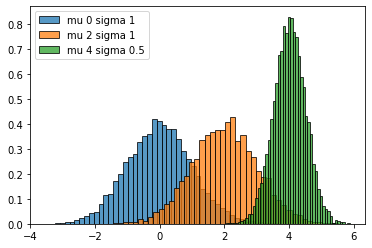

In [ ]:
# 1번 문제 정답
# 평균이 0, 표준편차가 1인 
k = 10000
mu = 0
sigma = 1
value = mu + np.random.randn(k) * sigma

mu = 2
sigma = 1
value2 = mu + np.random.randn(k) * sigma

mu = 4
sigma = 0.5
value3 = mu + np.random.randn(k) * sigma

plt.hist(value, bins=50, density=True, edgecolor='black', alpha=0.75, label='mu 0 sigma 1')
plt.hist(value2, bins=50, density=True, edgecolor='black', alpha=0.75, label='mu 2 sigma 1')
plt.hist(value3, bins=50, density=True, edgecolor='black', alpha=0.75, label='mu 4 sigma 0.5')

plt.legend()
plt.show()

In [ ]:
# 2-1번 문제 정답
a = pd.Series(np.array([5, 11, 12, 8, 9]), index=['소세지', '콜라', '라면', '요구르트', '김치'])

a

소세지      5
콜라      11
라면      12
요구르트     8
김치       9
dtype: int64

In [ ]:
# 2-2번 문제 정답
a = pd.Series({'소세지': 5, '콜라': 11, '라면':12, '요구르트':8, '김치':9})

a

소세지      5
콜라      11
라면      12
요구르트     8
김치       9
dtype: int64

In [ ]:

b = pd.Series(np.array([8, 15, 13, 8, 11]), index=['계란', '콜라','삼겹살','요구르트', '김치'])

b

계란       8
콜라      15
삼겹살     13
요구르트     8
김치      11
dtype: int64

In [ ]:
# 3-1번 문제 정답
a + b

계란       NaN
김치      20.0
라면       NaN
삼겹살      NaN
소세지      NaN
요구르트    16.0
콜라      26.0
dtype: float64

In [ ]:
# 3-2번 문제 정답 (1)
(a + b).dropna()

김치      20.0
요구르트    16.0
콜라      26.0
dtype: float64

In [ ]:
# 3-2번 문제 정답 (2)
idx = (a + b).notnull()

(a + b)[idx]

김치      20.0
요구르트    16.0
콜라      26.0
dtype: float64

In [ ]:
# 3-3 문제 정답
result = a.add(b, fill_value=5)

result

계란      13.0
김치      20.0
라면      17.0
삼겹살     18.0
소세지     10.0
요구르트    16.0
콜라      26.0
dtype: float64

In [ ]:
# 3-4 문제 정답
result[result > result.median()]

김치     20.0
삼겹살    18.0
콜라     26.0
dtype: float64

In [ ]:
sorted_result = result.sort_values()
sorted_result


소세지     10.0
계란      13.0
요구르트    16.0
라면      17.0
삼겹살     18.0
김치      20.0
콜라      26.0
dtype: float64

In [ ]:
# 3-5 문제 정답
result.loc[['소세지', '요구르트']]

result.iloc[4:6]

소세지     10.0
요구르트    16.0
dtype: float64

In [ ]:
# 4번 문제 정답
c = pd.DataFrame({'A마트': a, 'B마트': b})
c

,A마트,B마트
계란,NaN,8.0
김치,9.0,11.0
라면,12.0,NaN
삼겹살,NaN,13.0
소세지,5.0,NaN
요구르트,8.0,8.0
콜라,11.0,15.0


In [ ]:
# 4-1 정답
c.index

Index(['계란', '김치', '라면', '삼겹살', '소세지', '요구르트', '콜라'], dtype='object')

In [ ]:
c.columns

Index(['A마트', 'B마트'], dtype='object')

In [ ]:
# 4-2 정답
c['A마트'].dropna()

김치       9.0
라면      12.0
소세지      5.0
요구르트     8.0
콜라      11.0
Name: A마트, dtype: float64

In [ ]:
# 4-3 문제 정답
c.loc[['요구르트', '콜라']]

,A마트,B마트
요구르트,8.0,8.0
콜라,11.0,15.0


In [ ]:
c.loc['삼겹살':'콜라']

,A마트,B마트
삼겹살,NaN,13.0
소세지,5.0,NaN
요구르트,8.0,8.0
콜라,11.0,15.0


In [ ]:
# 4-4 문제 정답
input_data = [ {'A마트': 8.0, 'B마트': 8.0}, {'A마트': 11.0, 'B마트': 15.0 } ]
pd.DataFrame(data = input_data , index = ['요구르트', '콜라'])

,A마트,B마트
요구르트,8.0,8.0
콜라,11.0,15.0


In [ ]:
# 4-5 문제 정답
c.dropna(how='any')

,A마트,B마트
김치,9.0,11.0
요구르트,8.0,8.0
콜라,11.0,15.0


In [ ]:
# 4-6 문제 정답
six = c.fillna(0)
six

,A마트,B마트
계란,0.0,8.0
김치,9.0,11.0
라면,12.0,0.0
삼겹살,0.0,13.0
소세지,5.0,0.0
요구르트,8.0,8.0
콜라,11.0,15.0


In [ ]:
# 4-7 문제 정답
re_six = six.reindex(columns=list(six.columns) + ['C마트'], index=list(six.index))

re_six.loc[['라면', '요구르트'], ['C마트']] = 10
# re_six.loc[['라면', '요구르트']]['C마트'] = 10  # 복사된 DataFrame의 'C마트' 값 변경 (re_six 객체 값 변경 하지 않음)
re_six['C마트'][['라면', '요구르트']] = 10

re_six

,A마트,B마트,C마트
계란,0.0,8.0,NaN
김치,9.0,11.0,NaN
라면,12.0,0.0,10.0
삼겹살,0.0,13.0,NaN
소세지,5.0,0.0,NaN
요구르트,8.0,8.0,10.0
콜라,11.0,15.0,NaN


In [ ]:
# 5번 문제 정답
# idx = pd.date_range(start='2020-12-10', end='2020-12-14')
idx = pd.date_range(start='2020-12-10', periods=5)
idx

pd.DataFrame(np.array(['파이썬', '넘파이', '판다스', '기계학습', '딥러닝']), index=idx, columns=['강의 내용'])

,강의 내용
2020-12-10,파이썬
2020-12-11,넘파이
2020-12-12,판다스
2020-12-13,기계학습
2020-12-14,딥러닝
